In [1]:
import requests

In [2]:
base_url='http://books.toscrape.com/catalogue/page-{}.html'

In [3]:
res=requests.get('http://books.toscrape.com/catalogue/page-2.html')

In [4]:
import bs4

In [5]:
soup=bs4.BeautifulSoup(res.text,'lxml')

In [6]:
products=soup.select('.product_pod')

In [7]:
products

[<article class="product_pod">
 <div class="image_container">
 <a href="in-her-wake_980/index.html"><img alt="In Her Wake" class="thumbnail" src="../media/cache/5d/72/5d72709c6a7a9584a4d1cf07648bfce1.jpg"/></a>
 </div>
 <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="in-her-wake_980/index.html" title="In Her Wake">In Her Wake</a></h3>
 <div class="product_price">
 <p class="price_color">Â£12.84</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="how-music-works_979/index.html"><img alt="How Music Works" class="thumbnail" src="../media/cache/5c/c8/5cc8e107246cb478960d4f0aba1e1c8e.jpg"/></a>
 

In [8]:
example=products[0]

In [9]:
example

<article class="product_pod">
<div class="image_container">
<a href="in-her-wake_980/index.html"><img alt="In Her Wake" class="thumbnail" src="../media/cache/5d/72/5d72709c6a7a9584a4d1cf07648bfce1.jpg"/></a>
</div>
<p class="star-rating One">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="in-her-wake_980/index.html" title="In Her Wake">In Her Wake</a></h3>
<div class="product_price">
<p class="price_color">Â£12.84</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [10]:
example.select('.star-rating.One')

[<p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>]

In [11]:
example.select('a')[1]['title']

'In Her Wake'

In [12]:
base_url='http://books.toscrape.com/catalogue/page-{}.html'

In [13]:
bwos=[]
bwts=[]
bwths=[]
bwfs=[]
bwfvs=[]

In [14]:
for i in range(1,51):
    scrape_url=base_url.format(i)
    res=requests.get(scrape_url)
    soup=bs4.BeautifulSoup(res.text,'lxml')
    books=soup.select('.product_pod')
    for book in books:
        if(len(book.select('.star-rating.One'))!=0):
            bwos.append(book.select('a')[1]['title'])
        if(len(book.select('.star-rating.Two'))!=0):
            bwts.append(book.select('a')[1]['title'])
        if(len(book.select('.star-rating.Three'))!=0):
            bwths.append(book.select('a')[1]['title'])
        if(len(book.select('.star-rating.Four'))!=0):
            bwfs.append(book.select('a')[1]['title'])
        if(len(book.select('.star-rating.Five'))!=0):
            bwfvs.append(book.select('a')[1]['title'])

In [15]:
print('Total no of books with one star = {}'.format(len(bwos)))
print('Total no of books with two star = {}'.format(len(bwts)))
print('Total no of books with three star = {}'.format(len(bwths)))
print('Total no of books with four star = {}'.format(len(bwfs)))
print('Total no of books with five star = {}'.format(len(bwfvs)))

Total no of books with one star = 226
Total no of books with two star = 196
Total no of books with three star = 203
Total no of books with four star = 179
Total no of books with five star = 196


In [16]:
l1=len(bwos)
l2=len(bwts)
l3=len(bwths)
l4=len(bwfs)
l5=len(bwfvs)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd

In [19]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)

In [20]:
lst=[l1,l2,l3,l4,l5]
df=pd.DataFrame(lst,index='bwos bwts bwths bwfs bwfvs'.split(),columns=['Books'])
df_sns=pd.DataFrame({'Category':['bwos','bwts','bwths','bwfs','bwfvs'],'Books':[l1,l2,l3,l4,l5]})

In [21]:
df

,Books
bwos,226
bwts,196
bwths,203
bwfs,179
bwfvs,196


In [22]:
df_sns

,Category,Books
0,bwos,226
1,bwts,196
2,bwths,203
3,bwfs,179
4,bwfvs,196


<AxesSubplot:>

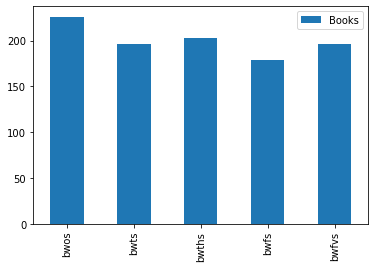

In [23]:
df.plot(kind='bar')

In [24]:
df.iplot(kind='bar',xTitle='Book with respective stars',yTitle='Number of books with respective stars',
         title='Number Of Books vs Star',theme='white')

<AxesSubplot:xlabel='Category', ylabel='Books'>

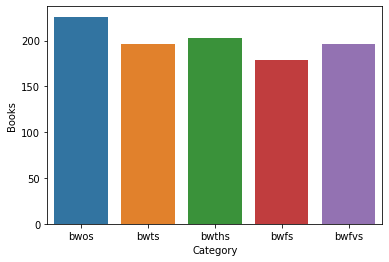

In [25]:
sns.barplot(x='Category',y='Books', data=df_sns)